<a href="https://colab.research.google.com/github/abedahdy500/Aqar_prediction/blob/main/Aqar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [216]:
df=pd.read_csv('/content/Sales Operations for Economic Cities Properties.csv')

In [217]:
df.head()

,Reference number,Economic city,District Name,Last activity date in years,Quarter,Land use,Contract value,Property area
0,32022004040849,King Abdullah Economic City,Murooj,2022,4,Residential,"1,450,000",631.75
1,32022004040727,King Abdullah Economic City,Murooj,2022,4,Residential,"1,651,844",633.40
2,32022004040595,King Abdullah Economic City,Murooj,2022,4,Residential,"1,232,977",254.09
3,32022004040489,King Abdullah Economic City,Murooj,2022,4,Residential,"1,000,000",704.00
4,32022004040469,King Abdullah Economic City,Hejaz,2022,4,Residential,"409,836",336.00


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Reference number             4788 non-null   int64 
 1   Economic city                4788 non-null   object
 2   District Name                4788 non-null   object
 3   Last activity date in years  4788 non-null   int64 
 4   Quarter                      4788 non-null   int64 
 5   Land use                     4788 non-null   object
 6   Contract value               4788 non-null   object
 7    Property area               4788 non-null   object
dtypes: int64(3), object(5)
memory usage: 299.4+ KB


In [219]:
df.isnull().sum()

,0
Reference number,0
Economic city,0
District Name,0
Last activity date in years,0
Quarter,0
Land use,0
Contract value,0
Property area,0


In [220]:
df.dtypes

,0
Reference number,int64
Economic city,object
District Name,object
Last activity date in years,int64
Quarter,int64
Land use,object
Contract value,object
Property area,object


In [221]:
df1 = df.copy()

In [222]:
df1['Contract value'] = df1['Contract value'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df1['Contract value'] = pd.to_numeric(df1['Contract value'], errors='coerce')
df1.head()


,Reference number,Economic city,District Name,Last activity date in years,Quarter,Land use,Contract value,Property area
0,32022004040849,King Abdullah Economic City,Murooj,2022,4,Residential,1450000.0,631.75
1,32022004040727,King Abdullah Economic City,Murooj,2022,4,Residential,1651844.0,633.40
2,32022004040595,King Abdullah Economic City,Murooj,2022,4,Residential,1232977.0,254.09
3,32022004040489,King Abdullah Economic City,Murooj,2022,4,Residential,1000000.0,704.00
4,32022004040469,King Abdullah Economic City,Hejaz,2022,4,Residential,409836.0,336.00


In [223]:
contract_by_city_quarter = df1.groupby(['Economic city', 'Quarter'])['Contract value'].sum().reset_index()
contract_by_city_quarter

,Economic city,Quarter,Contract value
0,King Abdullah Economic City,1,3.545844e+09
1,King Abdullah Economic City,2,6.502265e+08
2,King Abdullah Economic City,3,1.556475e+09
3,King Abdullah Economic City,4,1.796025e+09
4,the Knowledge Economic City,1,2.838673e+08
5,the Knowledge Economic City,2,1.221848e+08
6,the Knowledge Economic City,3,4.443910e+08
7,the Knowledge Economic City,4,1.166428e+08


In [224]:
contract_by_city_quarter['Growth Rate'] = df1.groupby('Economic city')['Contract value'].pct_change() * 100
contract_by_city_quarter

,Economic city,Quarter,Contract value,Growth Rate
0,King Abdullah Economic City,1,3.545844e+09,NaN
1,King Abdullah Economic City,2,6.502265e+08,13.920276
2,King Abdullah Economic City,3,1.556475e+09,-25.357540
3,King Abdullah Economic City,4,1.796025e+09,-18.895486
4,the Knowledge Economic City,1,2.838673e+08,-59.016400
5,the Knowledge Economic City,2,1.221848e+08,453.852761
6,the Knowledge Economic City,3,4.443910e+08,223.799324
7,the Knowledge Economic City,4,1.166428e+08,-93.673368


In [225]:
df1.dropna(inplace=True)

In [226]:
df1.columns

Index(['Reference number', 'Economic city', 'District Name',
       'Last activity date in years', 'Quarter', 'Land use', 'Contract value',
       ' Property area '],
      dtype='object')

In [227]:
df1 = df1.rename(columns={'Economic city': 'Economic_city','Reference number': 'Reference_number', 'Contract value': 'Contract_value','District Name':'District_Name'
,'Land use':'Land_use','Quarter':'Quarter',' Property area ':'Property_area','Last activity date in years':'Last_activity_date_in_years'})

In [228]:
df1.head()

,Reference_number,Economic_city,District_Name,Last_activity_date_in_years,Quarter,Land_use,Contract_value,Property_area
0,32022004040849,King Abdullah Economic City,Murooj,2022,4,Residential,1450000.0,631.75
1,32022004040727,King Abdullah Economic City,Murooj,2022,4,Residential,1651844.0,633.40
2,32022004040595,King Abdullah Economic City,Murooj,2022,4,Residential,1232977.0,254.09
3,32022004040489,King Abdullah Economic City,Murooj,2022,4,Residential,1000000.0,704.00
4,32022004040469,King Abdullah Economic City,Hejaz,2022,4,Residential,409836.0,336.00


In [229]:
df1.dtypes

,0
Reference_number,int64
Economic_city,object
District_Name,object
Last_activity_date_in_years,int64
Quarter,int64
Land_use,object
Contract_value,float64
Property_area,object


In [230]:
df1.columns

Index(['Reference_number', 'Economic_city', 'District_Name',
       'Last_activity_date_in_years', 'Quarter', 'Land_use', 'Contract_value',
       'Property_area'],
      dtype='object')

In [231]:
df1['Property_area'] = pd.to_numeric(df1['Property_area'], errors='coerce')

In [232]:
df1.dtypes

,0
Reference_number,int64
Economic_city,object
District_Name,object
Last_activity_date_in_years,int64
Quarter,int64
Land_use,object
Contract_value,float64
Property_area,float64


In [233]:
("1. Economic Cities by Transaction Count and Contract Value:")
city_demand = df1.groupby('Economic_city')['Contract_value'].agg(['count', 'sum', 'mean']).sort_values(by='count', ascending=False)
city_demand

,count,sum,mean
Economic_city,,,
King Abdullah Economic City,4504,7.548570e+09,1.675970e+06
the Knowledge Economic City,277,9.670859e+08,3.491285e+06


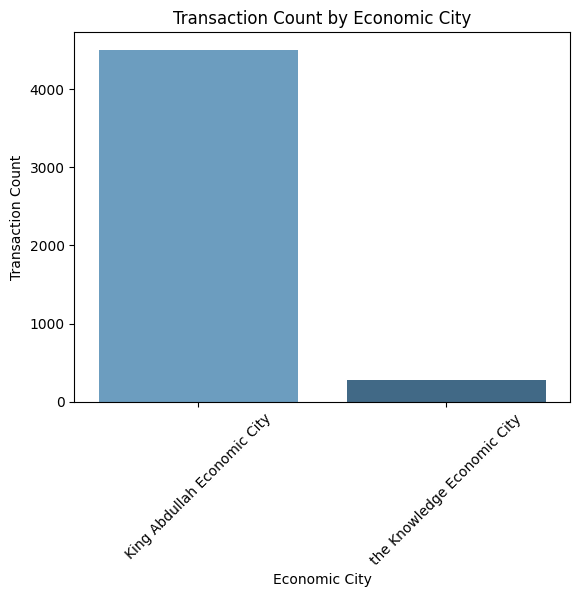

In [234]:
# Plot
sns.barplot(x=city_demand.index, y=city_demand['count'], palette='Blues_d')
plt.title("Transaction Count by Economic City")
plt.xlabel("Economic City")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

In [235]:
district_demand = df1.groupby(['Economic_city', 'District_Name'])['Reference_number'].count().sort_values(ascending=False)
district_demand

Economic_city                District_Name        
King Abdullah Economic City  Murooj                   1282
                             Hareer                    939
                             Talah                     860
                             Coastal Communities 1     444
                             Bay La Sun                377
                             West Residential 1        293
the Knowledge Economic City  Northern                  269
King Abdullah Economic City  IV3                       180
                             IV4                        79
                             IV2                        15
                             Haramain                   14
                             Hejaz                      13
the Knowledge Economic City  Centeral                    5
King Abdullah Economic City  Mustaqbal                   4
                             Tanmiyah                    4
the Knowledge Economic City  Western                     2
                             Eastern                     1
Name: Reference_number, dtype: int64

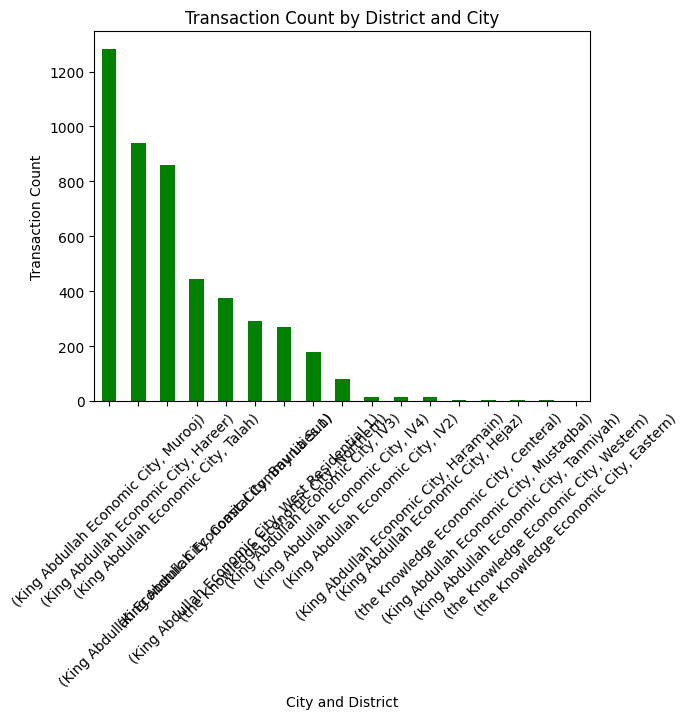

In [236]:
# Plot
district_demand.plot(kind='bar', color='green')
plt.title("Transaction Count by District and City")
plt.xlabel("City and District")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

In [237]:
land_use_demand = df1.groupby('Land_use')['Contract_value'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
land_use_demand

,count,mean
Land_use,,
Residential,4510,9.107247e+05
Industrial,192,1.415417e+07
Commercial / Services,60,9.495950e+06
Multiple,18,5.949612e+07
Commercial,1,5.000000e+07


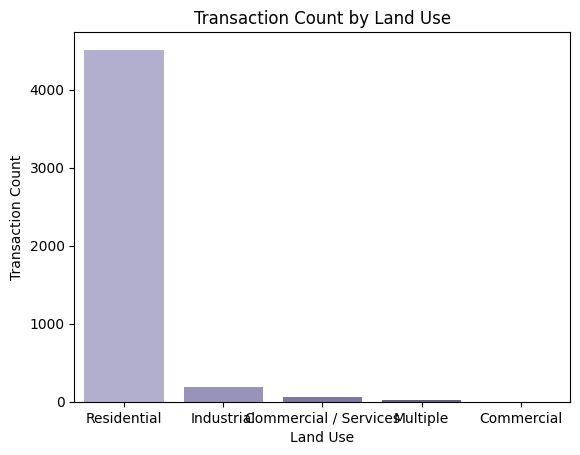

In [238]:
sns.barplot(x=land_use_demand.index, y=land_use_demand['count'], palette='Purples_d')
plt.title("Transaction Count by Land Use")
plt.xlabel("Land Use")
plt.ylabel("Transaction Count")
plt.show()

In [239]:
correlation = df1['Property_area'].corr(df1['Contract_value'])
(f"Correlation: {correlation:.2f}")

'Correlation: 0.32'

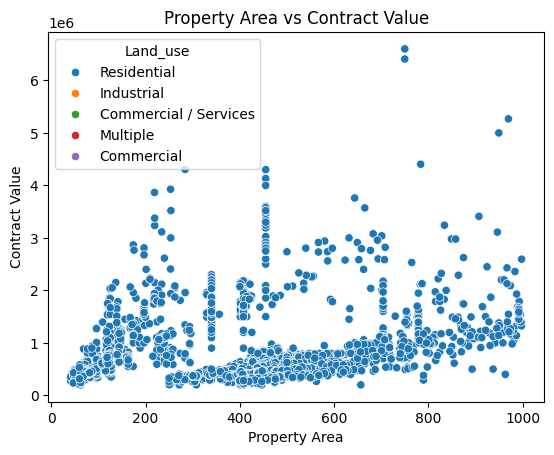

In [240]:
# Plot
sns.scatterplot(x='Property_area', y='Contract_value', hue='Land_use', data=df1)
plt.title("Property Area vs Contract Value")
plt.xlabel("Property Area")
plt.ylabel("Contract Value")
plt.show()

In [241]:
quarter_demand = df1.groupby('Quarter')['Contract_value'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
quarter_demand

,count,mean
Quarter,,
1,1575,2.431563e+06
4,1361,1.405340e+06
3,1108,1.805835e+06
2,737,1.048048e+06


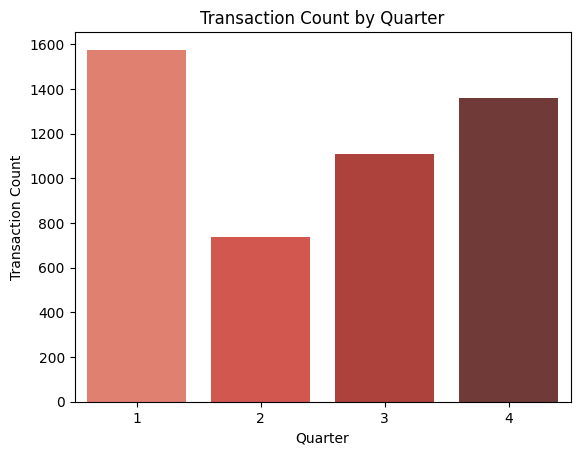

In [242]:
# Plot
sns.barplot(x=quarter_demand.index, y=quarter_demand['count'], palette='Reds_d')
plt.title("Transaction Count by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Transaction Count")
plt.show()

In [243]:
inactivity_demand = df1.groupby('Last_activity_date_in_years')['Contract_value'].mean().sort_index()
inactivity_demand

,Contract_value
Last_activity_date_in_years,
2016,9.605743e+06
2017,2.831582e+06
2018,1.266978e+06
2019,1.130588e+06
2020,1.556882e+06
2021,1.169457e+06
2022,1.700602e+06


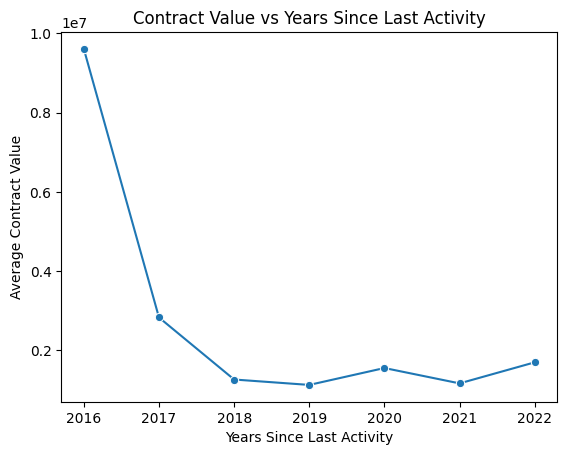

In [244]:
sns.lineplot(x=inactivity_demand.index, y=inactivity_demand.values, marker='o')
plt.title("Contract Value vs Years Since Last Activity")
plt.xlabel("Years Since Last Activity")
plt.ylabel("Average Contract Value")
plt.show()

In [245]:
df2 = df1.copy()

In [246]:
categorical_cols = df2.select_dtypes(include=['object']).columns

In [247]:
le = LabelEncoder()
for col in categorical_cols:
    df2[col] = le.fit_transform(df2[col])

In [248]:
corr_matrix = df2.corr().abs()

In [249]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [250]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [251]:
df2.fillna(0, inplace=True)

In [252]:
X=df2.drop(columns=['Reference_number','Contract_value'])
y=df2['Contract_value']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [255]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("New R² Score:", r2_score(y_test, y_pred_rf))


New R² Score: 0.8366671156263574


In [256]:
train_r2 = r2_score(y_train, rf_model.predict(X_train))
test_r2 = r2_score(y_test, y_pred_rf)

print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")



Training R² Score: 0.86
Testing R² Score: 0.84


In [257]:
import joblib

joblib.dump(rf_model, "Aqar_model.pkl")

print("Model saved successfully!")


Model saved successfully!
